# Data Inspection Notebook

This notebook serves as a comprehensive inspection of the data, similar to an EDA notebook. However, the main difference is this `inspection.ipynb` notebook lies in its objective of determining preparation strategies, while EDA notebook aims to generate business insights after cleaning the data (EDA here is for presentation need --> Exploratory + Explanatory). 

**Goal**: The aim of this notebook is to determine data processing strategies for the data to be sufficient for modeling or further analysis (data processing strategy: cleaning, wrangling, preprocessing, feature engineering strategies).

**Output**: Insights about how to treat data for modeling.

**Table of Content**
- [1 Library](#1-Library)
- [2 Load Data](#2-Load-Data)
- [3 EDA](#3-EDA)
    - [3.1 Missing Values Checking](#3.1-Missing-Values-Checking)
    - [3.2 Data Type Checking](#3.2-Data-Type-Checking)
    - [3.3 Data Range Checking](#3.3-Data-Range-Checking)
    - [3.4 Skewness Checking](#3.4-Skewness-Checking)
    - [3.5 Data Distribution](#3.5-Data-Distribution)
    - [3.6 Correlation](#3.6-Correlation)
    - [3.7 Outliers Checking](#3.7-Outliers-Checking)
    - [3.8 Categorical Data Checking](3.8-Categorical-Data-Checking)
- [4 Export Data](#4-Export-Data)
- [5 Conclusion](#5-Conclusion)

<span style="color:red"> <strong>Warning: </strong> </span> Due to the large size of the data, running this notebook may take approximately 5 minutes.

___
# 1 Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 2 Load Data

<span style="color:blue"> <strong>Must Read!</strong> </span>

The metadata can be seen in [this link](https://docs.google.com/spreadsheets/d/1NHvIAH6mABrFXmAoesHrzvaRmt5a5I7zCIHHoVLQOSA/edit?usp=sharing).

In [2]:
# Load data
propertySales = pd.read_csv('dataset/processed/propertySalesPrep.csv', index_col=0)

In [3]:
# Split data
X = propertySales.drop(columns = ['sale_price'])
y = propertySales['sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

print(len(X_train), len(y_train), len(X_valid), len(y_valid), len(X_test), len(y_test))

86604 86604 37116 37116 53023 53023


In [4]:
# Combine Xtrain with y_train and X_test with y_test
dataset = pd.concat([X_train, y_train], axis=1)
valid = pd.concat([X_valid, y_valid], axis=1)
test = pd.concat([X_test, y_test], axis=1)
dataset

,address,zip_code,borough_name,borough,block,lot,building_class_category,category_id,building_class_name,gross_square_feet,...,subway_count_in_1km,bus_count_in_1km,schools_count_in_1km,health_facil_count_in_1km,park_properties_count_in_1km,park_zones_count_in_1km,latitude,longitude,geometry,sale_price
128157,34 GRANT AVENUE,11208,BK,3,4111,66,02 TWO FAMILY DWELLINGS,2,TWO FAMILY DWELLINGS,2088.0,...,9.0,11.0,8.0,2.0,5.0,5.0,40.690112,-73.869123,POINT (-73.8691232 40.6901121),925000.0
158906,131-68 233RD STREET,11422,QN,4,12943,159,01 ONE FAMILY DWELLINGS,1,ONE FAMILY DWELLINGS,1272.0,...,0.0,4.0,5.0,4.0,3.0,0.0,40.676770,-73.736272,POINT (-73.7362723 40.6767698),630000.0
144731,2025 EAST 74TH STREET,11234,BK,3,8415,30,02 TWO FAMILY DWELLINGS,2,TWO FAMILY DWELLINGS,1998.0,...,0.0,4.0,6.0,1.0,7.0,5.0,40.622509,-73.906276,POINT (-73.9062763 40.6225087),1040000.0
40959,39 GRAHAM AVENUE,11206,BK,3,3113,20,22 STORE BUILDINGS,22,STORE BUILDINGS,3875.0,...,23.0,37.0,27.0,20.0,30.0,0.0,40.702705,-73.942760,POINT (-73.9427597 40.7027049),2025000.0
89241,115-42 126TH STREET,11420,QN,4,11669,26,03 THREE FAMILY DWELLINGS,3,THREE FAMILY DWELLINGS,2016.0,...,0.0,7.0,5.0,1.0,7.0,0.0,40.677535,-73.813173,POINT (-73.8131729 40.6775352),555000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94820,228 BAYVIEW AVENUE,10309,SI,5,6742,25,01 ONE FAMILY DWELLINGS,1,ONE FAMILY DWELLINGS,895.0,...,2.0,1.0,2.0,2.0,2.0,2.0,40.519530,-74.205024,POINT (-74.2050238 40.5195297),550000.0
183653,215-34 MURDOCK AVENUE,11429,QN,4,11232,22,01 ONE FAMILY DWELLINGS,1,ONE FAMILY DWELLINGS,1688.0,...,0.0,8.0,11.0,2.0,4.0,0.0,40.703118,-73.739172,POINT (-73.7391724 40.703118),640000.0
113299,130-33 226TH STREET,11413,QN,4,12904,20,01 ONE FAMILY DWELLINGS,1,ONE FAMILY DWELLINGS,1456.0,...,0.0,4.0,7.0,2.0,3.0,0.0,40.681768,-73.741116,POINT (-73.7411163 40.681768),450000.0
24213,47-59 49TH STREET,11377,QN,4,2287,1,30 WAREHOUSES,30,WAREHOUSES,14137.0,...,14.0,6.0,24.0,3.0,10.0,0.0,40.739345,-73.916371,POINT (-73.9163711 40.739345),1700000.0


In [5]:
dataset.columns

Index(['address', 'zip_code', 'borough_name', 'borough', 'block', 'lot',
       'building_class_category', 'category_id', 'building_class_name',
       'gross_square_feet', 'year_built', 'sale_date', 'subway_count_in_1km',
       'bus_count_in_1km', 'schools_count_in_1km', 'health_facil_count_in_1km',
       'park_properties_count_in_1km', 'park_zones_count_in_1km', 'latitude',
       'longitude', 'geometry', 'sale_price'],
      dtype='object')

# 3 EDA

## 3.1 Missing Values Checking

In [24]:
pd.DataFrame(dataset.isna().sum()/len(dataset)*100, columns=['%Null'])

,%Null
address,0.0
zip_code,0.0
borough_name,0.0
borough,0.0
block,0.0
lot,0.0
building_class_category,0.0
category_id,0.0
building_class_name,0.0
gross_square_feet,0.0


## 3.2 Data Type Checking

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86604 entries, 128157 to 143066
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   address                       86604 non-null  object 
 1   zip_code                      86604 non-null  int64  
 2   borough_name                  86604 non-null  object 
 3   borough                       86604 non-null  int64  
 4   block                         86604 non-null  int64  
 5   lot                           86604 non-null  int64  
 6   building_class_category       86604 non-null  object 
 7   category_id                   86604 non-null  int64  
 8   building_class_name           86604 non-null  object 
 9   gross_square_feet             86604 non-null  float64
 10  year_built                    86604 non-null  float64
 11  sale_date                     86604 non-null  object 
 12  subway_count_in_1km           86604 non-null  float64
 13  

## 3.3 Data Range Checking

In [7]:
# Check data range
dataset.describe()

,zip_code,borough,block,lot,category_id,gross_square_feet,year_built,subway_count_in_1km,bus_count_in_1km,schools_count_in_1km,health_facil_count_in_1km,park_properties_count_in_1km,park_zones_count_in_1km,latitude,longitude,sale_price
count,86604.000000,86604.000000,86604.000000,86604.000000,86604.000000,86604.000000,86604.000000,86604.000000,86604.000000,86604.000000,86604.000000,86604.000000,86604.000000,86604.000000,86604.000000,8.660400e+04
mean,11048.765323,3.443340,5771.036049,60.560240,3.362304,3150.379913,1939.212392,7.002321,10.051857,14.539652,8.370676,10.199598,3.373274,40.697867,-73.904423,1.523282e+06
std,453.556841,0.969918,3807.049064,123.349918,5.681299,6313.069054,29.240503,11.381142,10.222712,10.444955,8.154345,9.468964,4.525155,0.085001,0.114169,5.158238e+06
min,10001.000000,1.000000,5.000000,1.000000,1.000000,300.000000,1850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.498664,-74.254000,1.000000e+04
25%,10469.000000,3.000000,2874.000000,19.000000,1.000000,1400.000000,1920.000000,0.000000,3.000000,7.000000,2.000000,5.000000,0.000000,40.634054,-73.959821,5.100000e+05
50%,11228.000000,4.000000,5117.000000,38.000000,2.000000,1932.000000,1930.000000,3.000000,7.000000,12.000000,6.000000,7.000000,2.000000,40.687571,-73.893187,7.450000e+05
75%,11378.000000,4.000000,8142.000000,63.000000,2.000000,2753.250000,1955.000000,11.000000,13.000000,20.000000,12.000000,12.000000,5.000000,40.749334,-73.820867,1.130000e+06
max,11694.000000,5.000000,16323.000000,4336.000000,41.000000,99875.000000,2022.000000,145.000000,71.000000,77.000000,58.000000,69.000000,46.000000,40.912681,-73.700418,4.100000e+08


## 3.4 Skewness Checking

In [8]:
# Check skewness
dataset.skew(numeric_only = True)

zip_code                        -0.918802
borough                         -0.450294
block                            0.664440
lot                             11.868816
category_id                      3.695919
gross_square_feet                8.403327
year_built                       0.943913
subway_count_in_1km              4.289883
bus_count_in_1km                 2.004743
schools_count_in_1km             1.294571
health_facil_count_in_1km        1.677911
park_properties_count_in_1km     2.171613
park_zones_count_in_1km          2.801109
latitude                         0.406994
longitude                       -0.759445
sale_price                      27.681005
dtype: float64

In [9]:
# Check skewness (if > 0.5 then skewed)
dataset.skew(numeric_only = True) > 0.5

zip_code                        False
borough                         False
block                            True
lot                              True
category_id                      True
gross_square_feet                True
year_built                       True
subway_count_in_1km              True
bus_count_in_1km                 True
schools_count_in_1km             True
health_facil_count_in_1km        True
park_properties_count_in_1km     True
park_zones_count_in_1km          True
latitude                        False
longitude                       False
sale_price                       True
dtype: bool

## 3.5 Data Distribution

In [10]:
dataset.columns

Index(['address', 'zip_code', 'borough_name', 'borough', 'block', 'lot',
       'building_class_category', 'category_id', 'building_class_name',
       'gross_square_feet', 'year_built', 'sale_date', 'subway_count_in_1km',
       'bus_count_in_1km', 'schools_count_in_1km', 'health_facil_count_in_1km',
       'park_properties_count_in_1km', 'park_zones_count_in_1km', 'latitude',
       'longitude', 'geometry', 'sale_price'],
      dtype='object')

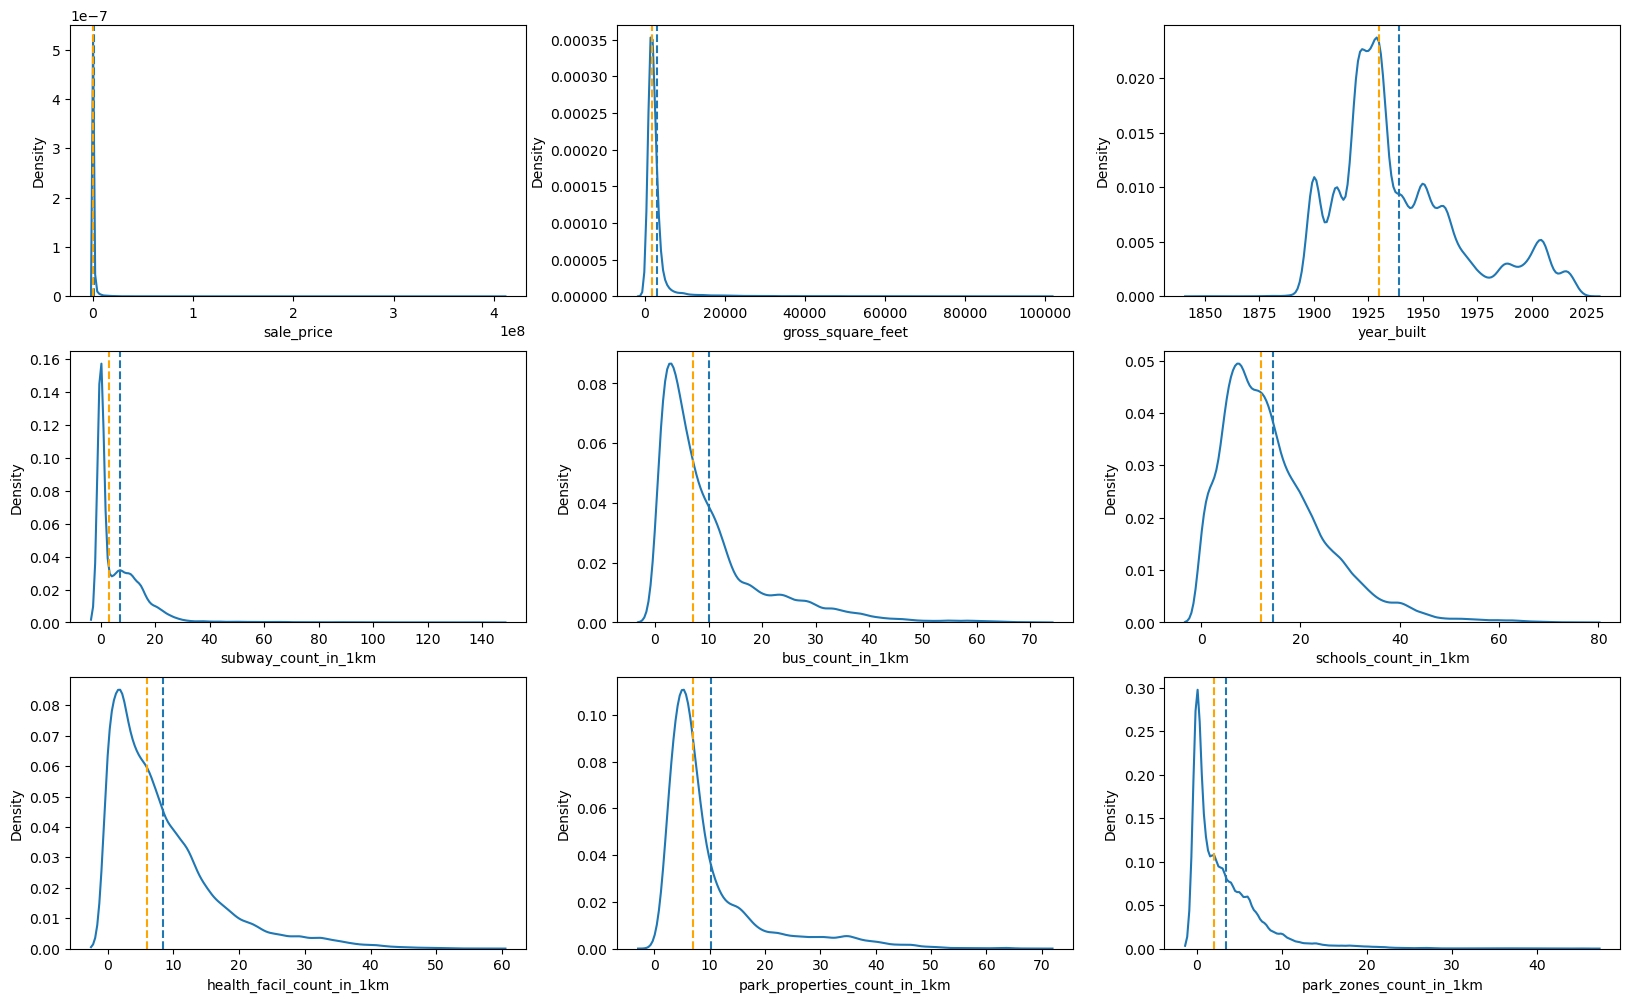

In [25]:
# Plot to see numerical variables distribution
num_EDA = [
    'sale_price', 'gross_square_feet', 'year_built', 'subway_count_in_1km',
    'bus_count_in_1km', 'schools_count_in_1km', 'health_facil_count_in_1km',
    'park_properties_count_in_1km', 'park_zones_count_in_1km'
]

plt.figure(figsize = (20, 12))

for i in range(len(num_EDA)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data = dataset, x = dataset[num_EDA[i]])
    plt.axvline(dataset[num_EDA[i]].mean(), 0, 1, color = "#1f77b4",  ls = '--')
    plt.axvline(dataset[num_EDA[i]].median(), 0, 1, color = "orange",  ls = '--')    

In [12]:
dataset['building_class_category'].unique()

array(['02 TWO FAMILY DWELLINGS', '01 ONE FAMILY DWELLINGS',
       '22 STORE BUILDINGS', '03 THREE FAMILY DWELLINGS',
       '29 COMMERCIAL GARAGES', '07 RENTALS - WALKUP APARTMENTS',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES', '27 FACTORIES',
       '21 OFFICE BUILDINGS', '14 RENTALS - 4-10 UNIT',
       '08 RENTALS - ELEVATOR APARTMENTS', '41 TAX CLASS 4 - OTHER',
       '26 OTHER HOTELS', '23 LOFT BUILDINGS',
       '33 EDUCATIONAL FACILITIES', '37 RELIGIOUS FACILITIES',
       '30 WAREHOUSES', '09 COOPS - WALKUP APARTMENTS',
       '32 HOSPITAL AND HEALTH FACILITIES', '25 LUXURY HOTELS',
       '38 ASYLUMS AND HOMES', '39 TRANSPORTATION FACILITIES',
       '10 COOPS - ELEVATOR APARTMENTS', '05 TAX CLASS 1 VACANT LAND',
       '36 OUTDOOR RECREATIONAL FACILITIES', '06 TAX CLASS 1 - OTHER',
       '34 THEATRES', '31 COMMERCIAL VACANT LAND',
       '40 SELECTED GOVERNMENTAL FACILITIES'], dtype=object)

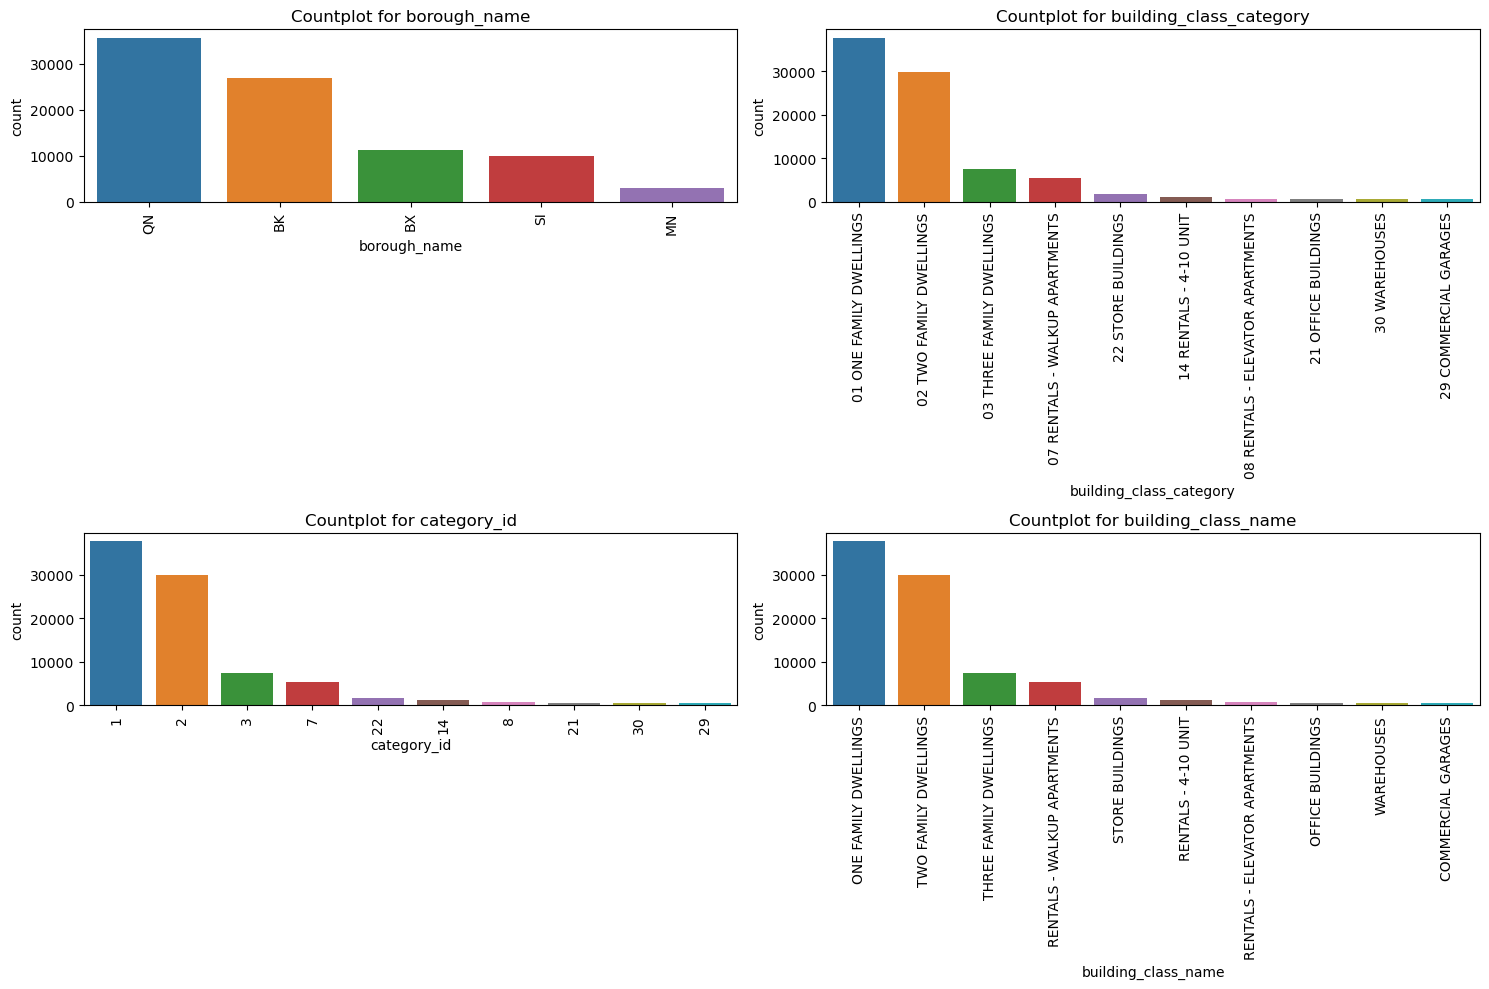

In [13]:
# Plot to see categorical variables distribution

## Setup for 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  
axes = axes.flatten() 

## List of columns to plot
cat_EDA = ['borough_name', 'building_class_category', 'category_id', 'building_class_name']

## Creating countplots for each column in different subplots
for i, column in enumerate(cat_EDA):
    sns.countplot(x=column, data=dataset, ax=axes[i], order=pd.value_counts(dataset[column]).iloc[:10].index)
    axes[i].set_title(f'Countplot for {column}')
    axes[i].tick_params(axis='x', rotation=90) 

plt.tight_layout()
plt.show()

## 3.6 Correlation

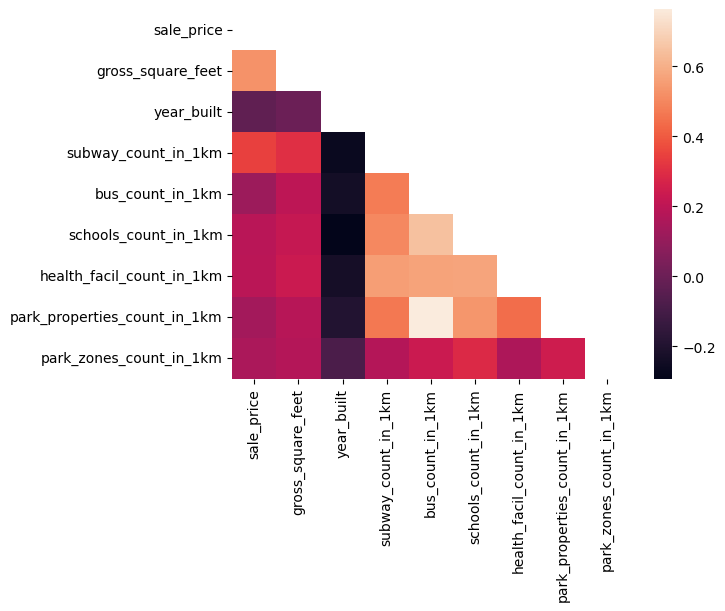

In [14]:
# Visualize pearson correlation
sns.heatmap(dataset[num_EDA].corr(numeric_only = True), 
            annot = True, 
            fmt = '.1f',
            mask = np.triu(np.ones_like(dataset[num_EDA].corr(numeric_only = True), dtype=bool)));

## 3.7 Outliers Checking

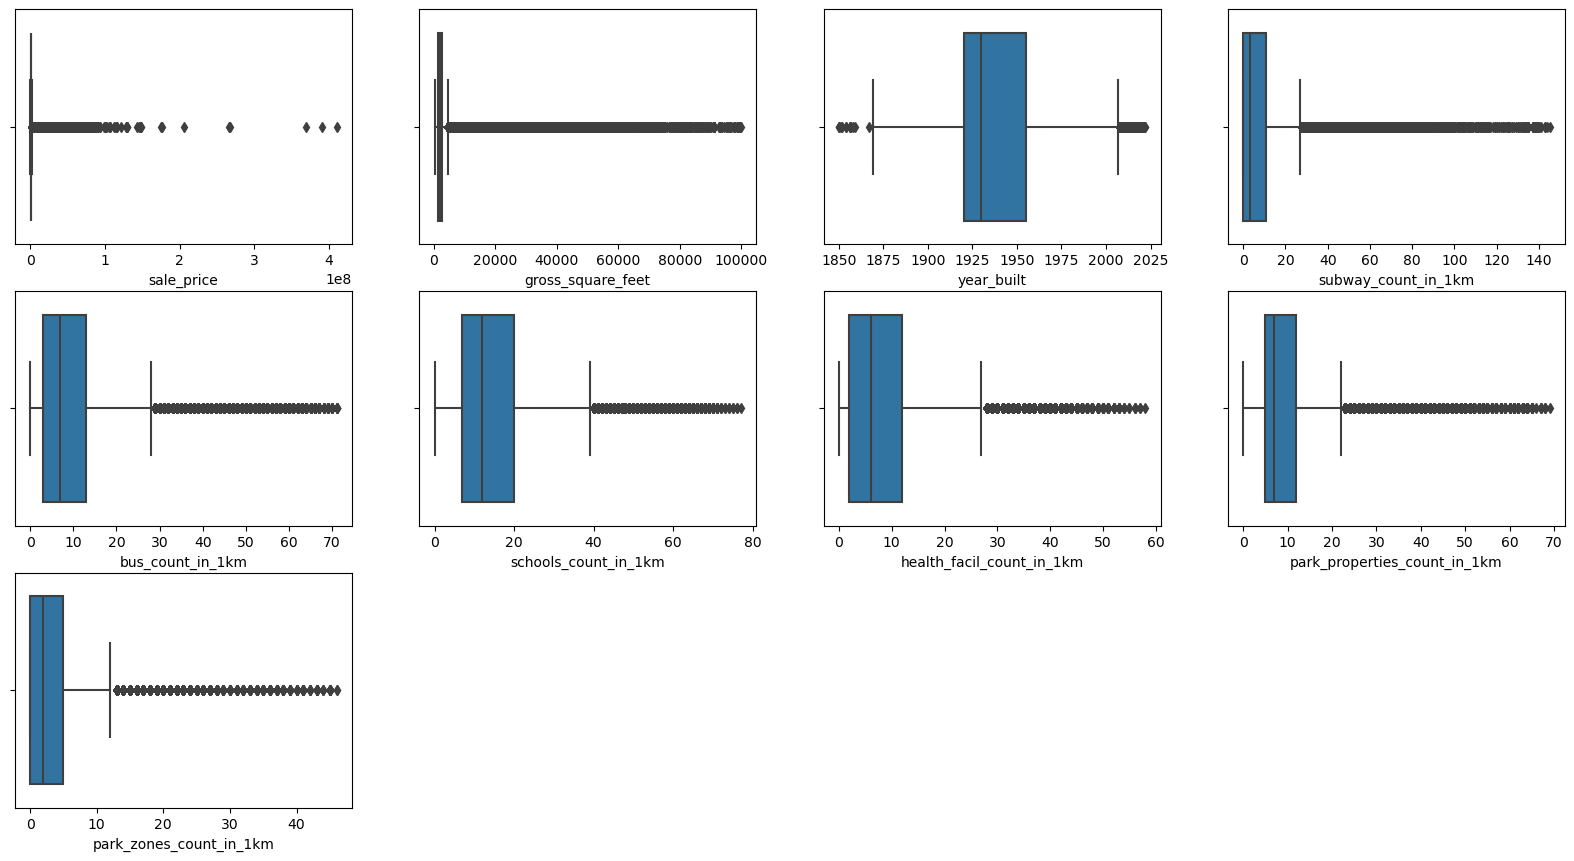

In [15]:
# Check outliers using boxplot
plt.figure(figsize = (20, 25))

for i in range(len(num_EDA)):
    plt.subplot(7, 4, i+1)
    sns.boxplot(data = dataset, x = dataset[num_EDA[i]])

In [16]:
# Count outliers
list_number_of_outliers = []

for num_var in num_EDA:
    q1 = dataset.describe()[num_var]['25%']
    q3 = dataset.describe()[num_var]['75%']
    iqr = q3 - q1
    upper_fence = q3 + (1.5 * iqr)
    lower_fence = q1 - (1.5 * iqr)

    # count number of outliers in 'total_refunds'
    number_of_outliers = len(dataset[(dataset[num_var] < lower_fence) | (dataset[num_var] > upper_fence)])
    list_number_of_outliers.append(number_of_outliers)

# Create dataframe
outliers_df = pd.DataFrame({'columns': num_EDA, 'outliers_count':list_number_of_outliers})
outliers_df['outliers_percentage'] = round(outliers_df['outliers_count'] / len(dataset) * 100, 2)
outliers_df

,columns,outliers_count,outliers_percentage
0,sale_price,8794,10.15
1,gross_square_feet,6959,8.04
2,year_built,2278,2.63
3,subway_count_in_1km,2640,3.05
4,bus_count_in_1km,6020,6.95
5,schools_count_in_1km,2559,2.95
6,health_facil_count_in_1km,3550,4.10
7,park_properties_count_in_1km,9092,10.50
8,park_zones_count_in_1km,3620,4.18


## 3.8 Categorical Data Checking

In [17]:
print(dataset['building_class_category'].unique())

['02 TWO FAMILY DWELLINGS' '01 ONE FAMILY DWELLINGS' '22 STORE BUILDINGS'
 '03 THREE FAMILY DWELLINGS' '29 COMMERCIAL GARAGES'
 '07 RENTALS - WALKUP APARTMENTS'
 '35 INDOOR PUBLIC AND CULTURAL FACILITIES' '27 FACTORIES'
 '21 OFFICE BUILDINGS' '14 RENTALS - 4-10 UNIT'
 '08 RENTALS - ELEVATOR APARTMENTS' '41 TAX CLASS 4 - OTHER'
 '26 OTHER HOTELS' '23 LOFT BUILDINGS' '33 EDUCATIONAL FACILITIES'
 '37 RELIGIOUS FACILITIES' '30 WAREHOUSES' '09 COOPS - WALKUP APARTMENTS'
 '32 HOSPITAL AND HEALTH FACILITIES' '25 LUXURY HOTELS'
 '38 ASYLUMS AND HOMES' '39 TRANSPORTATION FACILITIES'
 '10 COOPS - ELEVATOR APARTMENTS' '05 TAX CLASS 1 VACANT LAND'
 '36 OUTDOOR RECREATIONAL FACILITIES' '06 TAX CLASS 1 - OTHER'
 '34 THEATRES' '31 COMMERCIAL VACANT LAND'
 '40 SELECTED GOVERNMENTAL FACILITIES']


In [18]:
print(dataset['category_id'].unique())

[ 2  1 22  3 29  7 35 27 21 14  8 41 26 23 33 37 30  9 32 25 38 39 10  5
 36  6 34 31 40]


In [19]:
dataset['sale_date'].max()

'2022-12-30'

# 4 Export Data

In [20]:
len(test)

53023

In [26]:
# Save as csv
dataset.to_csv('dataset/split/dataset_train.csv')
valid.to_csv('dataset/split/dataset_valid.csv')
test.to_csv('dataset/split/dataset_test.csv')

# 5 Conclusion

1. Missing value handling: NO missing values
2. Remove irrelevant columns for modeling: 'address', 'zipcode', 'borough_name', 'borough', 'block', 'lot', 'latitude', 'longitude', 'geometry', 'category_id', 'sale_date'
3. OHE for: building_class_category
4. Filter housing category only ('02 TWO FAMILY DWELLINGS', '01 ONE FAMILY DWELLINGS',  '03 THREE FAMILY DWELLINGS')
5. Hanlde outliers by removing or replacing it with mean/median